In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nepali_datetime
import datetime
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,train_test_split


In [413]:
#importing data
file = r"C:\Users\DELL\Downloads\764807bc-1927-4576-acc7-c5b4bc4afd5b.csv"
df = pd.read_csv(file)

In [414]:
#EDA
df.head()

,_id,S.N.,Developer,Projects,Location,Capacity (kW),PPA Date,Commercial Operation Date
0,1,1,Himal Power Ltd.,Khimti Khola,Dolkha,60000.0,2052-10-01T00:00:00.000,2057-03-27T00:00:00.000
1,2,2,Bhotekoshi Power Company Ltd.,Bhotekoshi Khola,Sindhupalchowk,45000.0,2053-04-06T00:00:00.000,2057-10-11T00:00:00.000
2,3,3,Syange Electricity Company Limited,Syange Khola,Lamjung,183.0,2058-10-03T00:00:00.000,2058-10-10T00:00:00.000
3,4,4,National Hydro Power Company Ltd.,Indrawati - III,Sindhupalchowk,7500.0,2054-08-15T00:00:00.000,2059-06-21T00:00:00.000
4,5,5,Chilime Hydro Power Company Ltd.,Chilime,Rasuwa,22100.0,2054-03-11T00:00:00.000,2060-05-08T00:00:00.000


In [415]:
df.describe()

,_id,S.N.,Capacity (kW)
count,70.000000,70.000000,70.00000
mean,35.500000,35.500000,6902.22000
std,20.351085,20.351085,10866.67792
min,1.000000,1.000000,23.00000
25%,18.250000,18.250000,1800.00000
50%,35.500000,35.500000,4000.00000
75%,52.750000,52.750000,6750.00000
max,70.000000,70.000000,60000.00000


In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        70 non-null     int64  
 1   S.N.                       70 non-null     int64  
 2   Developer                  70 non-null     object 
 3   Projects                   70 non-null     object 
 4   Location                   70 non-null     object 
 5   Capacity (kW)              70 non-null     float64
 6   PPA Date                   70 non-null     object 
 7   Commercial Operation Date  70 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.5+ KB


In [417]:
#cleaning data

def clean(bs_date_time):
    if isinstance(bs_date_time, nepali_datetime.date):
        return bs_date_time

    if pd.isnull(bs_date_time) or str(bs_date_time).strip() == '':
        return None

    bs_date_str = str(bs_date_time)

    if 'T' in bs_date_str:
        bs_date_part = bs_date_str.split('T')[0]
    else:
        bs_date_part = bs_date_str

    bs_date_part = bs_date_part.replace('.', '-')

    parts = bs_date_part.split('-')
    if len(parts) != 3:
        return None  

    try:
        year, month, day = map(int, parts)
        return nepali_datetime.date(year, month, day)
    except ValueError:
        return None  

df['PPA Date'] = df['PPA Date'].apply(clean)
df['Commercial Operation Date'] = df['Commercial Operation Date'].apply(clean)
    

In [418]:
df.head()

,_id,S.N.,Developer,Projects,Location,Capacity (kW),PPA Date,Commercial Operation Date
0,1,1,Himal Power Ltd.,Khimti Khola,Dolkha,60000.0,2052-10-01,2057-03-27
1,2,2,Bhotekoshi Power Company Ltd.,Bhotekoshi Khola,Sindhupalchowk,45000.0,2053-04-06,2057-10-11
2,3,3,Syange Electricity Company Limited,Syange Khola,Lamjung,183.0,2058-10-03,2058-10-10
3,4,4,National Hydro Power Company Ltd.,Indrawati - III,Sindhupalchowk,7500.0,2054-08-15,2059-06-21
4,5,5,Chilime Hydro Power Company Ltd.,Chilime,Rasuwa,22100.0,2054-03-11,2060-05-08


In [419]:
print(df.to_string())

    _id  S.N.                                                                              Developer              Projects        Location  Capacity (kW)    PPA Date Commercial Operation Date
0     1     1                                                                       Himal Power Ltd.          Khimti Khola          Dolkha        60000.0  2052-10-01                2057-03-27
1     2     2                                                          Bhotekoshi Power Company Ltd.      Bhotekoshi Khola  Sindhupalchowk        45000.0  2053-04-06                2057-10-11
2     3     3                                                     Syange Electricity Company Limited          Syange Khola         Lamjung          183.0  2058-10-03                2058-10-10
3     4     4                                                      National Hydro Power Company Ltd.       Indrawati - III  Sindhupalchowk         7500.0  2054-08-15                2059-06-21
4     5     5                           

In [420]:
#data was conberted from ad to bs in externally
df.replace({'Commercial Operation Date':{None:'2062-09-17'}},inplace = True)
df.replace({'Location':{'Sindhupalchok':'Sindhupalchowk'}},inplace = True)
df.replace({'Location':{'Panchtar':'Panchthar'}},inplace = True)
df.replace({'Location':{'Ilam':'Illam'}},inplace = True)
df.replace({'Location':{'Dolkha':'Dolakha'}},inplace = True)

In [421]:
df.head(10)

,_id,S.N.,Developer,Projects,Location,Capacity (kW),PPA Date,Commercial Operation Date
0,1,1,Himal Power Ltd.,Khimti Khola,Dolakha,60000.0,2052-10-01,2057-03-27
1,2,2,Bhotekoshi Power Company Ltd.,Bhotekoshi Khola,Sindhupalchowk,45000.0,2053-04-06,2057-10-11
2,3,3,Syange Electricity Company Limited,Syange Khola,Lamjung,183.0,2058-10-03,2058-10-10
3,4,4,National Hydro Power Company Ltd.,Indrawati - III,Sindhupalchowk,7500.0,2054-08-15,2059-06-21
4,5,5,Chilime Hydro Power Company Ltd.,Chilime,Rasuwa,22100.0,2054-03-11,2060-05-08
5,6,6,Butwal Power Company Ltd.,Jhimruk Khola,Pyuthan,12000.0,2058-03-29,2062-09-17
6,7,7,Butwal Power Company Ltd.,Andhi Khola,Syangza,9400.0,2058-03-29,2071-12-22
7,8,8,Arun Valley Hydropower Development Co. (P.) Ltd.,Piluwa Khola Small,Sankhuwasabha,3000.0,2056-10-09,2060-06-01
8,9,9,Rairang Hydro Power Development Co. (P) Ltd.,Rairang Khola,Dhading,500.0,2059-08-27,2061-08-01
9,10,10,Sanima Hydropower (Pvt.) Ltd.,Sunkoshi Small,Sindhupalchowk,2500.0,2058-07-28,2061-12-11


In [422]:
df.dtypes

_id                            int64
S.N.                           int64
Developer                     object
Projects                      object
Location                      object
Capacity (kW)                float64
PPA Date                      object
Commercial Operation Date     object
dtype: object

In [423]:
#Feature engineering
x = df['PPA Date'].apply(lambda y: nepali_datetime.date(y.year, y.month, y.day))
today = nepali_datetime.date.today()
df["Project Age"] = (today - x).apply(lambda z: z.days / 365)

In [424]:
df['Project Age'] = np.round(df['Project Age'],0)

In [425]:
df['Capacity (kW)'] = df['Capacity (kW)']/1000
df.rename(columns = {'Capacity (kW)':"Capacity_MW"},inplace = True)

In [426]:
#o = df['Commercial Operation Date'].apply(lambda u:nepali_datetime.date(u.year,u.month,u.day))
df['Completion time'] = (o - x).apply(lambda g:g.days/365)
df['Completion time'] = np.round(df['Completion time'],2)

In [427]:
df.head()

,_id,S.N.,Developer,Projects,Location,Capacity_MW,PPA Date,Commercial Operation Date,Project Age,Completion time
0,1,1,Himal Power Ltd.,Khimti Khola,Dolakha,60.000,2052-10-01,2057-03-27,29.0,4.49
1,2,2,Bhotekoshi Power Company Ltd.,Bhotekoshi Khola,Sindhupalchowk,45.000,2053-04-06,2057-10-11,29.0,4.52
2,3,3,Syange Electricity Company Limited,Syange Khola,Lamjung,0.183,2058-10-03,2058-10-10,23.0,0.02
3,4,4,National Hydro Power Company Ltd.,Indrawati - III,Sindhupalchowk,7.500,2054-08-15,2059-06-21,27.0,4.85
4,5,5,Chilime Hydro Power Company Ltd.,Chilime,Rasuwa,22.100,2054-03-11,2060-05-08,28.0,6.17


In [428]:
df = df[df['Completion time'] != -10.54]
#Descriptive Statistics
Avg_capacity_MW = df['Capacity_MW'].mean()
print(f'The average capacity is {Avg_capacity_MW:.2f} MW')
Avg_project_age = df['Project Age'].mean()
print(f'The average project age is {Avg_project_age:.2f} years')
Avg_completion_time = df['Completion time'].mean()
print(f'The average completion time is {Avg_capacity_MW:.2f} years \n')

min_index = df['Capacity_MW'].idxmin()
print('Project with min capacity description :\n',df.loc[min_index])

max_index = df['Capacity_MW'].idxmax()
print('\nProject with min capacity description :\n',df.loc[max_index])



The average capacity is 6.83 MW
The average project age is 17.52 years
The average completion time is 6.83 years 

Project with min capacity description :
 _id                                                        70
S.N.                                                       70
Developer                    Syauri Bhumey Microhydro Project
Projects                                        Syauri Bhumey
Location                                              Nuwakot
Capacity_MW                                             0.023
PPA Date                                           2072-11-16
Commercial Operation Date                          2074-10-18
Project Age                                               9.0
Completion time                                          1.93
Name: 69, dtype: object

Project with min capacity description :
 _id                                         1
S.N.                                        1
Developer                    Himal Power Ltd.
Projects            

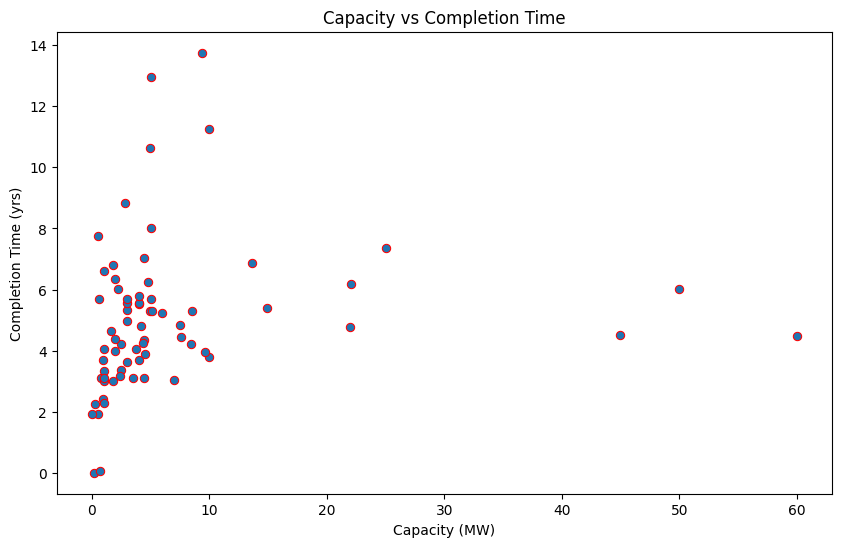

In [429]:
#Trend Analysis

#Capacity  vs Completion time
x = df['Capacity_MW']
y = df['Completion time']
plt.figure(figsize = (10,6))
plt.title("Capacity vs Completion Time")
plt.xlabel("Capacity (MW)")
plt.ylabel("Completion Time (yrs)")
plt.scatter(x,y,edgecolors = 'r',linewidth = 0.75)
plt.show()

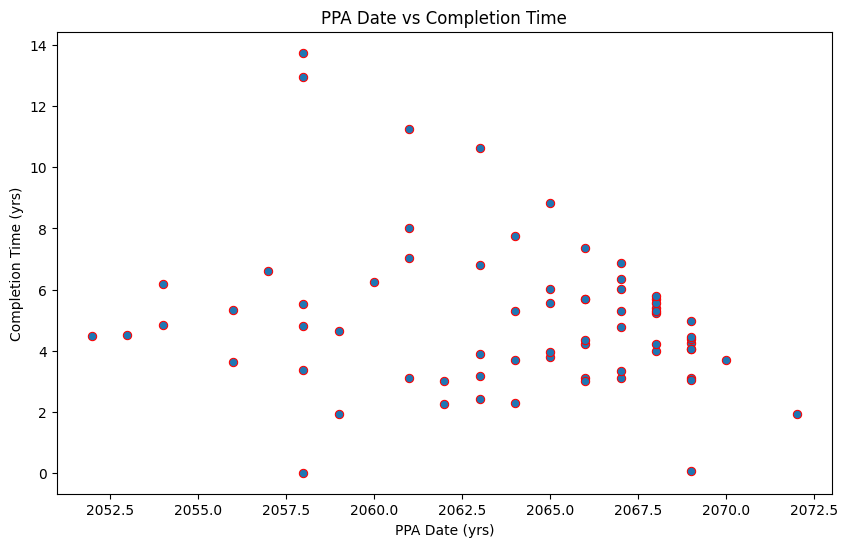

In [430]:
#PPA Date vs Completion time
x = df['PPA Date'].apply(lambda y: nepali_datetime.date(y.year, y.month, y.day).year).astype(int)
y = df['Completion time']
plt.figure(figsize = (10,6))
plt.title("PPA Date vs Completion Time")
plt.xlabel("PPA Date (yrs)")
plt.ylabel("Completion Time (yrs)")
plt.scatter(x,y,edgecolors = 'r',linewidth = 0.75)
plt.show()

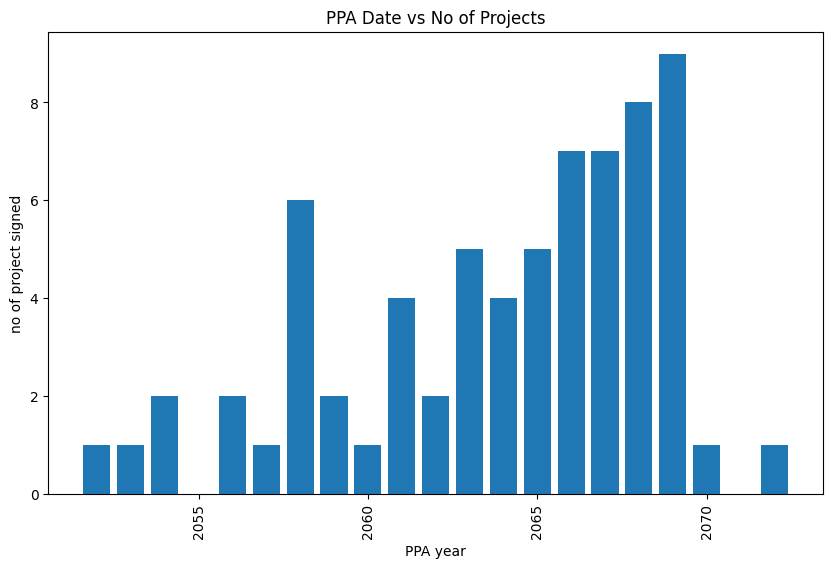

In [431]:
#PPA Date vs no of projects
df['ppa_year']= df['PPA Date'].apply(lambda y: nepali_datetime.date(y.year, y.month, y.day).year).astype(int)
grouping = df.groupby(['ppa_year']).size().reset_index(name = 'no of project')

plt.figure(figsize = (10,6))
plt.title("PPA Date vs No of Projects")
plt.xlabel('PPA year')
plt.ylabel('no of project signed')
plt.bar(grouping['ppa_year'],grouping['no of project'])
plt.xticks(rotation = 90)
plt.show()

In [432]:
#Location vs total capacity
df_grp_loc = df[['Location','Capacity_MW']]
df_grouped = df_grp_loc.groupby(['Location'],as_index = False).agg({'Capacity_MW':'sum'})

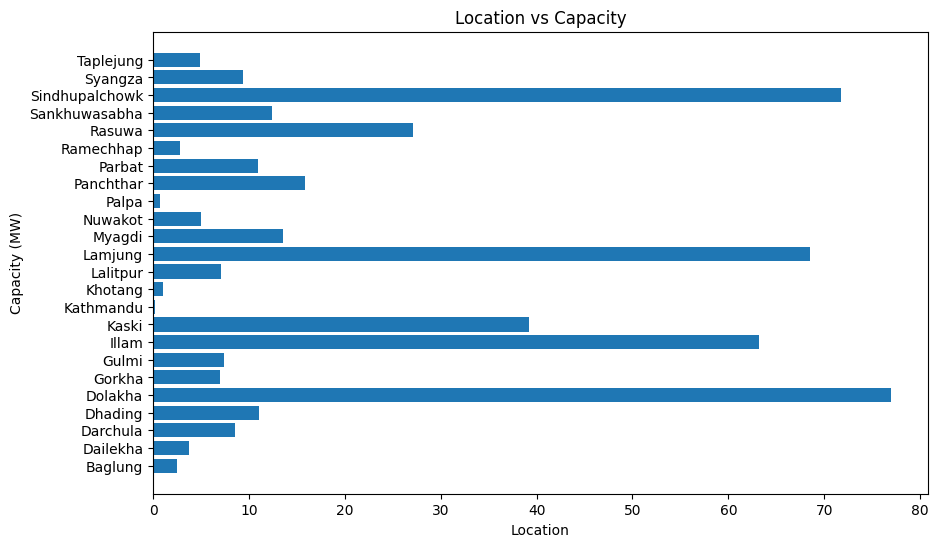

In [433]:
x = df_grouped['Location']
y = df_grouped['Capacity_MW']
plt.figure(figsize = (10,6))
plt.title('Location vs Capacity')
plt.xlabel('Location')
plt.ylabel('Capacity (MW)')
plt.barh(x,y)
plt.show()

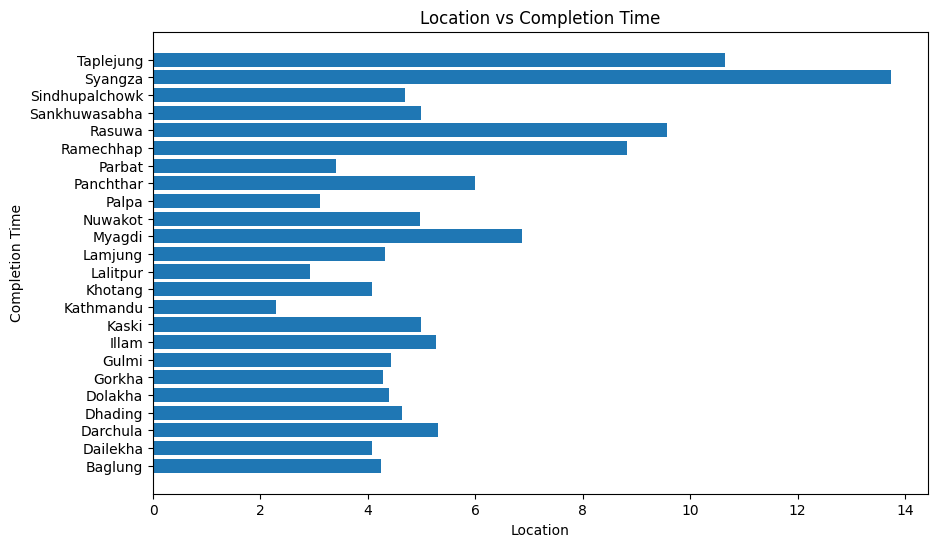

In [434]:
#Location vs Completion Time
df_grp_loc1 = df[['Location','Completion time']]
df_grouped1 = df_grp_loc1.groupby(['Location'],as_index = False).agg({'Completion time':'mean'})
x = df_grouped1['Location']
y = df_grouped1['Completion time']
plt.figure(figsize = (10,6))
plt.title('Location vs Completion Time')
plt.xlabel('Location')
plt.ylabel('Completion Time')
plt.barh(x,y)
plt.show()

In [435]:
df.head()


,_id,S.N.,Developer,Projects,Location,Capacity_MW,PPA Date,Commercial Operation Date,Project Age,Completion time,ppa_year
0,1,1,Himal Power Ltd.,Khimti Khola,Dolakha,60.000,2052-10-01,2057-03-27,29.0,4.49,2052
1,2,2,Bhotekoshi Power Company Ltd.,Bhotekoshi Khola,Sindhupalchowk,45.000,2053-04-06,2057-10-11,29.0,4.52,2053
2,3,3,Syange Electricity Company Limited,Syange Khola,Lamjung,0.183,2058-10-03,2058-10-10,23.0,0.02,2058
3,4,4,National Hydro Power Company Ltd.,Indrawati - III,Sindhupalchowk,7.500,2054-08-15,2059-06-21,27.0,4.85,2054
4,5,5,Chilime Hydro Power Company Ltd.,Chilime,Rasuwa,22.100,2054-03-11,2060-05-08,28.0,6.17,2054


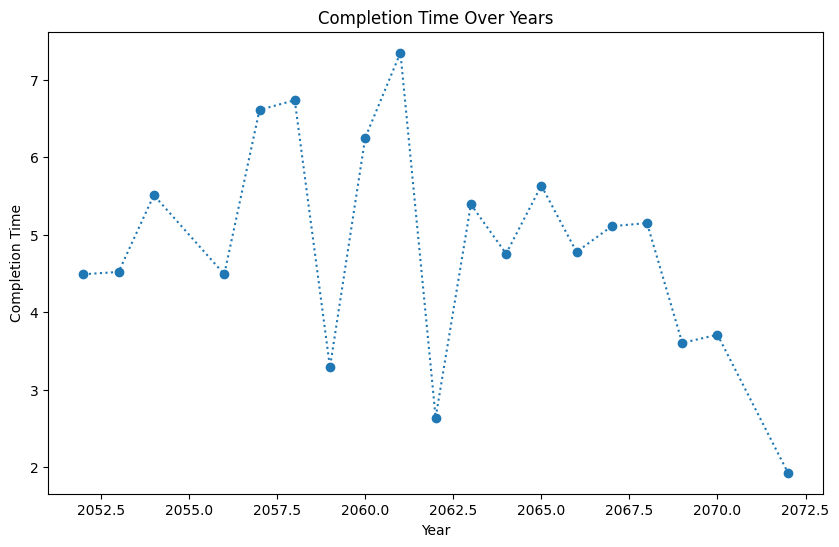

In [436]:
df_grp_loc2 = df[['ppa_year','Completion time']]
df_grouped2 = df_grp_loc2.groupby(['ppa_year'],as_index = False).agg({'Completion time':'mean'})
x = df_grouped2['ppa_year']
y = df_grouped2['Completion time']
plt.figure(figsize = (10,6))
plt.title('Completion Time Over Years')
plt.xlabel("Year")
plt.ylabel("Completion Time")
plt.plot(x,y, marker = 'o',ls = ':')

In [437]:
#correlation
df[['Completion time','Capacity_MW']].corr()

,Completion time,Capacity_MW
Completion time,1.000000,0.144077
Capacity_MW,0.144077,1.000000


The Pearson Correlation Coefficient is 0.1440771354732843 with a P-value of P = 0.23756111567577246


<Axes: xlabel='Completion time', ylabel='Capacity_MW'>

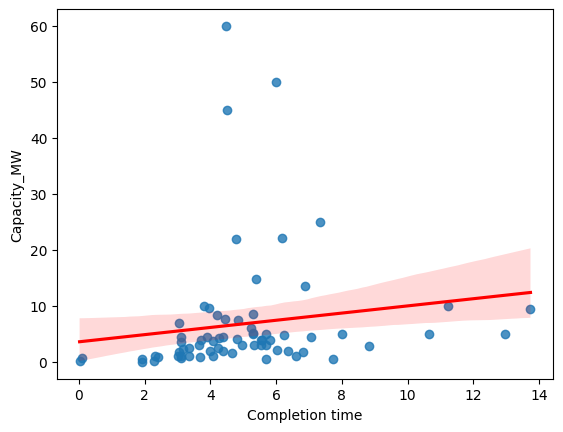

In [438]:
pearson_coef,p_value = stats.pearsonr(df['Completion time'],df['Capacity_MW'])
print('The Pearson Correlation Coefficient is',pearson_coef,'with a P-value of P =',p_value)
sns.regplot(x = 'Completion time', y = 'Capacity_MW',data = df,line_kws = {'color': 'red'}) 

In [439]:
df[['Completion time','Project Age']].corr()

,Completion time,Project Age
Completion time,1.000000,0.210931
Project Age,0.210931,1.000000


The Pearson Correlation Coefficient is 0.21093099289498957 with a P-value of P = 0.08190337125099643


<Axes: xlabel='Completion time', ylabel='Project Age'>

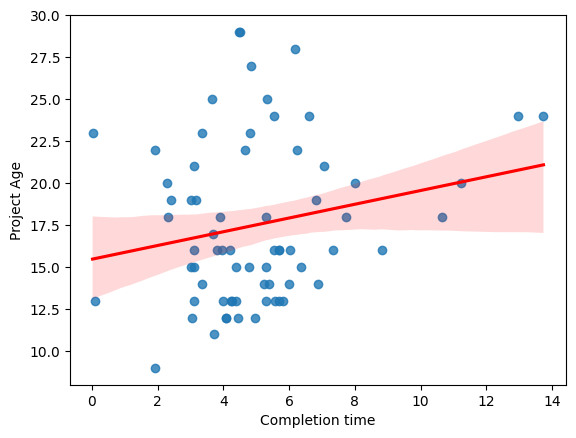

In [440]:
pearson_coef,p_value = stats.pearsonr(df['Completion time'],df['Project Age'])
print('The Pearson Correlation Coefficient is',pearson_coef,'with a P-value of P =',p_value)
sns.regplot(x = 'Completion time', y = 'Project Age',data = df,line_kws = {'color': 'red'}) 

The Pearson Correlation Coefficient is 0.29157628815947384 with a P-value of P = 0.015063826771122082


<Axes: xlabel='Capacity_MW', ylabel='Project Age'>

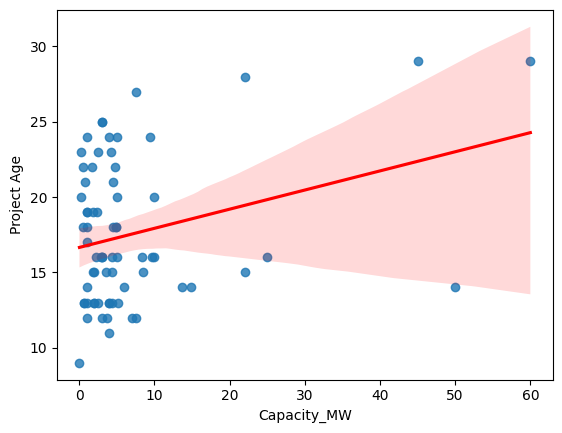

In [441]:
df[['Capacity_MW','Project Age']].corr()
pearson_coef,p_value = stats.pearsonr(df['Capacity_MW'],df['Project Age'])
print('The Pearson Correlation Coefficient is',pearson_coef,'with a P-value of P =',p_value)
sns.regplot(x = 'Capacity_MW', y = 'Project Age',data = df,line_kws = {'color': 'red'}) 

In [442]:
df_gptest = df[['Capacity_MW','Completion time','Project Age']]
grouped_test1 = df_gptest.groupby(['Capacity_MW','Completion time'],as_index=False).mean()

In [443]:
grouped_pivot = grouped_test1.pivot(index='Capacity_MW',columns='Completion time')
grouped_pivot = grouped_pivot.fillna(0)

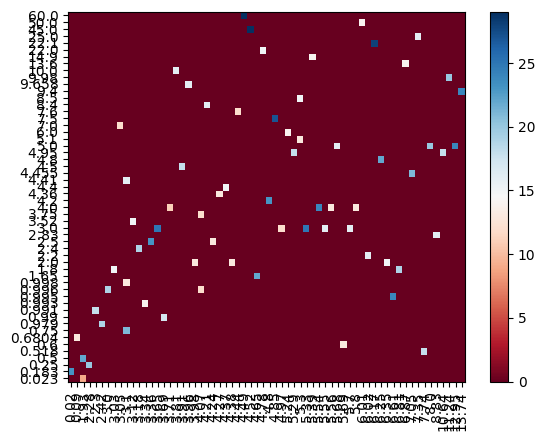

<Figure size 20000x10000 with 0 Axes>

In [444]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)
plt.figure(figsize = (200,100))
fig.colorbar(im)
plt.show()

In [445]:
#Regression Model
##Between Capacity and Completion Time
lm = LinearRegression()
lm
x = df[['Capacity_MW']]
y = df['Completion time']
lm.fit(x,y)
yhat = lm.predict(x)
yhat[0:5]

array([6.7383946 , 6.25276803, 4.80181297, 5.03870161, 5.51137814])

In [446]:
lm.intercept_

4.79588832882979

In [447]:
lm.coef_

array([0.0323751])

In [448]:
print('The R-square is:',lm.score(x,y))

The R-square is: 0.02075822096618718


In [449]:
mse = mean_squared_error(df['Completion time'], yhat)
print("The mean squared error of completion Time and predicted value is:",mse)


The mean squared error of completion Time and predicted value is: 5.819802221189457


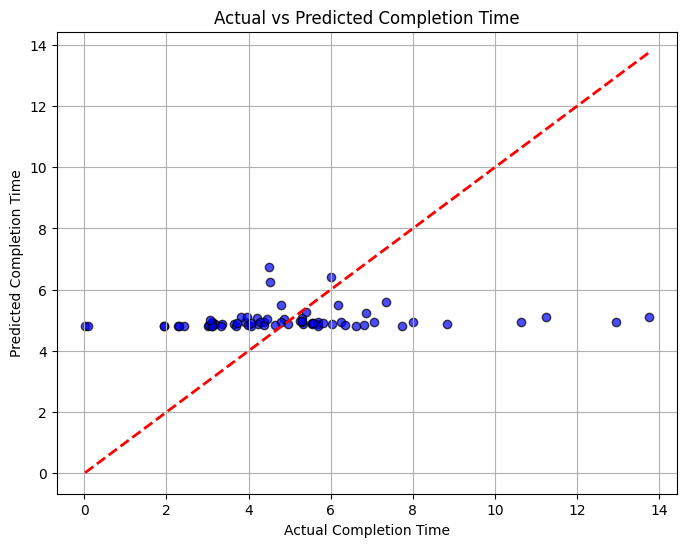

In [450]:
plt.figure(figsize=(8, 6))

# Scatter plot: Actual vs Predicted
plt.scatter(y, yhat, color='blue', edgecolors='k', alpha=0.7)

# Plot a diagonal reference line (perfect prediction line)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)

plt.xlabel('Actual Completion Time')
plt.ylabel('Predicted Completion Time')
plt.title('Actual vs Predicted Completion Time')
plt.grid(True)
plt.show()

In [456]:
#Multiple Regression
lm2 = LinearRegression()
z= df[['Capacity_MW','Project Age']]
lm2.fit(z,y)
lm2.coef_

array([0.02027915, 0.09522995])

In [455]:
lm2.intercept_

3.2098892510226253

In [ ]:
yhat = lm2.predict(z)

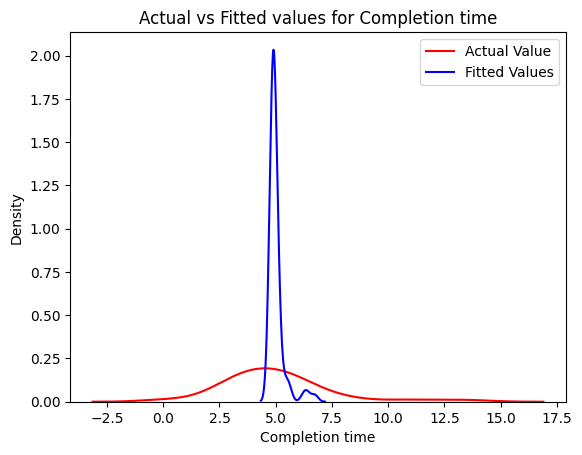

In [458]:
ax1 = sns.kdeplot(df['Completion time'], color="r", label="Actual Value")
sns.kdeplot(yhat, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted values for Completion time')
plt.xlabel('Completion time')
plt.ylabel('Density')

plt.legend()
plt.show()
plt.close()


In [459]:
lm.fit(z, y)
print('The R-square is: ', lm.score(z, y))

The R-square is:  0.051944013906181974


In [460]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(y,yhat))

The mean square error of price and predicted value using multifit is:  5.819802221189457


In [462]:
df.to_csv('Cleaned_Hydropower_projects_nepal.csv',index = False)